In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
data = pd.read_csv('housing.csv')

In [2]:
data.isnull().any().sum()

0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BC83FC8>,
      dtype=object)

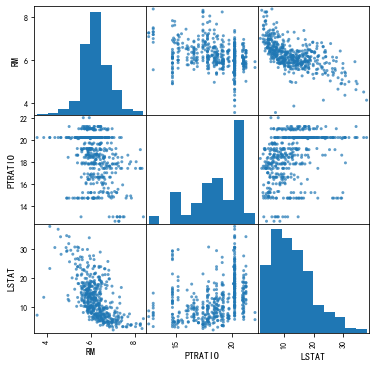

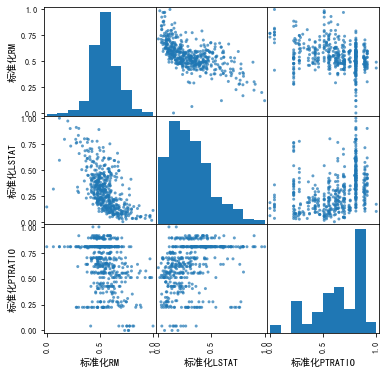

In [13]:
features = data[['RM', 'PTRATIO', 'LSTAT']]
pd.plotting.scatter_matrix(features, alpha=0.7, figsize=(6,6), diagonal='hist')
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
for feature in features.columns:
    features['标准化'+feature] = scaler.fit_transform(features[[feature]])

#散点可视化，查看特征归一化后的数据
font={
      'family':'SimHei'
      }
matplotlib.rc('font', **font)
pd.plotting.scatter_matrix(features[['标准化RM', '标准化LSTAT', '标准化PTRATIO']], alpha=0.7, figsize=(6,6), diagonal='hist')

In [16]:
#将数据拆分为训练数据及测试数据
y = data[['MEDV']]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features[['标准化RM', '标准化PTRATIO', '标准化LSTAT']], y, test_size=0.3,random_state=33)
#采用交叉验证的方法对模型进行评估
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

Text(0, 0.5, 'mean-score')

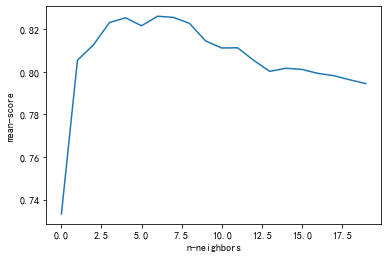

In [17]:
#KNN模型预测房价
from sklearn.neighbors import KNeighborsRegressor
score=[]
for n_neighbors in range(1,21):
    knn = KNeighborsRegressor(n_neighbors, weights = 'uniform' )
    knn_predict = cross_val_predict(knn, x_train, y_train, cv=5)
    knn_score = cross_val_score(knn, x_train, y_train, cv=5)
    knn_meanscore = knn_score.mean()
    score.append(knn_meanscore)
plt.plot(score)
plt.xlabel('n-neighbors')
plt.ylabel('mean-score')

In [18]:
#随着n_neighbors的逐渐增大，模型预测能力逐渐增强，但是当n_neighbors大于2以后，模型评分趋于下降。因此我们选取n_neighbors=2
n_neighbors=2
knn = KNeighborsRegressor(n_neighbors, weights = 'uniform' )
knn_predict = cross_val_predict(knn, x_train, y_train, cv=5)
knn_score = cross_val_score(knn, x_train, y_train, cv=5)
knn_meanscore = knn_score.mean()

In [19]:
#模型评估
evaluating = {
        'knn':knn_score,
        }
evaluating = pd.DataFrame(evaluating)

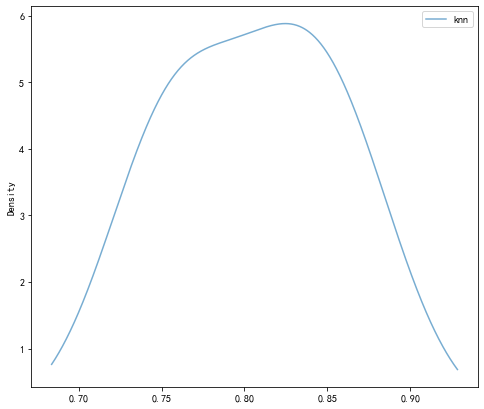

In [20]:
#可视化
evaluating.plot.kde(alpha=0.6,figsize=(8,7))

In [22]:
#测试数据集进行预测
knn.fit(x_train,y_train)
knn_y_predict = knn.predict(x_test)
knn_y_predict_score = knn.score(x_test, y_test)
predict_score = {
        'knn':knn_y_predict_score,
        }
predict_score = pd.DataFrame(predict_score, index=['score']).transpose()
predict_score.sort_values(by='score',ascending = False)

,score
knn,0.693957
